In [32]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn  as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import files
uploaded = files.upload()

In [63]:
dataset = pd.read_csv('datasets_2667_4430_bigml_59c28831336c6604c800002a (2).csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
print(X[0])

[128 415 'no' 'yes' 25 265.1 110 45.07 197.4 99 16.78 244.7 91 11.01 10.0
 3 2.7 1]


[128 415 0 1 25 265.1 110 45.07 197.4 99 16.78 244.7 91 11.01 10.0 3 2.7 1]


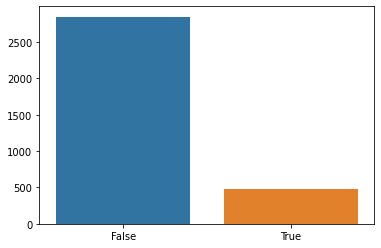

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
lw = LabelEncoder()
X[:, 3] = le.fit_transform(X[:, 3])
print(X[0])
Y = dataset["churn"].value_counts()
sns.barplot(Y.index, Y.values)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
ann = tf.keras.models.Sequential()

In [0]:
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

In [0]:
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

In [0]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [0]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [72]:
ann.fit(X_train, y_train, batch_size = 20, epochs = 100)

Epoch 1/100
134/134 [==============================] - 0s 1ms/step - loss: 0.4656 - accuracy: 0.8455
Epoch 2/100
134/134 [==============================] - 0s 1ms/step - loss: 0.4073 - accuracy: 0.8518
Epoch 3/100
134/134 [==============================] - 0s 1ms/step - loss: 0.3743 - accuracy: 0.8530
Epoch 4/100
134/134 [==============================] - 0s 1ms/step - loss: 0.3442 - accuracy: 0.8646
Epoch 5/100
134/134 [==============================] - 0s 1ms/step - loss: 0.3202 - accuracy: 0.8770
Epoch 6/100
134/134 [==============================] - 0s 2ms/step - loss: 0.3036 - accuracy: 0.8863
Epoch 7/100
134/134 [==============================] - 0s 1ms/step - loss: 0.2935 - accuracy: 0.8931
Epoch 8/100
134/134 [==============================] - 0s 1ms/step - loss: 0.2849 - accuracy: 0.8957
Epoch 9/100
134/134 [==============================] - 0s 1ms/step - loss: 0.2783 - accuracy: 0.8961
Epoch 10/100
134/134 [==============================] - 0s 1ms/step - loss: 0.2730 - accura

In [74]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ True False]
 [False False]
 [False False]
 ...
 [False False]
 [False  True]
 [False False]]


In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The accuracy achieved is:",accuracy_score(y_test, y_pred)*100)


[[552  27]
 [ 32  56]]
The accuracy achieved is: 91.1544227886057
